# made by Aryan rathore (cse core student at vit bhopal)
# email :- Aryanrathore13572002@gmail.com
# linkedin :- https://www.linkedin.com/in/aryan-rathore-b15459215/
# github :- https://github.com/aryanrathore1012
# ________________________________________________________________________________

# objective 
<b> use historical data of air quality readings from india to predict air quality index of a given region. </b>

# what is AQI?

<b> The Air Quality Index (AQI) is used for reporting daily air quality. It tells you how clean or polluted your air is, and what associated health effects might be a concern for you. The AQI focuses on health effects you may experience within a few hours or days after breathing polluted air. </b>

# what does this notebook do?

<b> 

* https://www.diva-portal.org/smash/get/diva2:1681590/FULLTEXT02 in this reasearch paper the creators have only dumped the data into
thier machine learning models but did not explore the data itself. 

* the models they used achived (Ridge regression {mea: 27.907 rmse: 36.791, r2: 0.8089}) score so i will try to build a better model in this ipynb

</b>

# where you can get this data?

<b> The dataset is avaible on kaggle this is the link: https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india

* city_day csv
* city_hour csv
* station_day csv
* station_hour csv

</b>

# ________________________________________________________________________________

# Index
<b>

1. Imports
2. reading the station_merged_csv (check the other ipynb to see how it was made)
3. preliminary and exploratory data analysis of station_merged_csv
4. data preproccessing and seprating our dataset into target_y and features_x dfs
5. using train test split and fitting our data into ml models of choice
6. evaluating our models
7. conclusion
8. has the main goal of the notebook been achived?
9. saving the model into a binary file so we can use it in the GUI program

</b>

# ________________________________________________________________________________

# 1. Imports


In [83]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import math
import joblib
%matplotlib inline

# ________________________________________________________________________________
# 2. reading the station_merged_csv (check the other ipynb to see how it was made)

In [2]:
station_merged_data = pd.read_csv("F://aryans_code_notes//machine_learning//AQI_predictior//station_merged.csv")

# ________________________________________________________________________________
# 3. preliminary and exploratory data analysis of station_merged_csv

checking if the station_merged_df 
0. things changed in the station_merged_csv
1. general shape 
2. some values
3. columns
4. data distribution


### 0. things changed in the station_merged_csv

* all of this stuff was changed in exploratory_analysis_of_aqi_in_india_1.ipynb

* dropped all columns where aqi reading was none
* numerical missing values were replaced with means of the respective columns 
* dropped the date column and added day, month, year columns instead

In [3]:
# 1. general shape
station_merged_data.shape

(87025, 20)

In [4]:
# 2. some values
station_merged_data


,StationId,City,State,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,day
0,AP001,Amaravati,Andhra Pradesh,81.40,124.50,1.440000,20.500000,12.080000,10.720000,0.12,15.24,127.09,0.20,6.50,0.060000,184.0,Moderate,2017,11,25
1,AP001,Amaravati,Andhra Pradesh,78.32,129.06,1.260000,26.000000,14.850000,10.280000,0.14,26.96,117.44,0.22,7.95,0.080000,197.0,Moderate,2017,11,26
2,AP001,Amaravati,Andhra Pradesh,88.76,135.32,6.600000,30.850000,21.770000,12.910000,0.11,33.59,111.81,0.29,7.63,0.120000,198.0,Moderate,2017,11,27
3,AP001,Amaravati,Andhra Pradesh,64.18,104.09,2.560000,28.070000,17.010000,11.420000,0.09,19.00,138.18,0.17,5.02,0.070000,188.0,Moderate,2017,11,28
4,AP001,Amaravati,Andhra Pradesh,72.47,114.84,5.230000,23.200000,16.590000,12.250000,0.16,10.55,109.74,0.21,4.71,0.080000,173.0,Moderate,2017,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87020,WB013,Kolkata,West Bengal,8.65,16.46,23.244401,35.118825,43.246664,28.654163,0.69,4.36,30.59,1.32,7.26,2.770696,50.0,Good,2020,6,27
87021,WB013,Kolkata,West Bengal,11.80,18.47,23.244401,35.118825,43.246664,28.654163,0.68,3.49,38.95,1.42,7.92,2.770696,65.0,Satisfactory,2020,6,28
87022,WB013,Kolkata,West Bengal,18.60,32.26,13.650000,200.870000,214.200000,11.400000,0.78,5.12,38.17,3.52,8.64,2.770696,63.0,Satisfactory,2020,6,29
87023,WB013,Kolkata,West Bengal,16.07,39.30,7.560000,29.130000,36.690000,29.260000,0.69,5.88,29.64,1.86,8.40,2.770696,57.0,Satisfactory,2020,6,30


In [5]:
# 3. columns
station_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87025 entries, 0 to 87024
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StationId   87025 non-null  object 
 1   City        87025 non-null  object 
 2   State       87025 non-null  object 
 3   PM2.5       87025 non-null  float64
 4   PM10        87025 non-null  float64
 5   NO          87025 non-null  float64
 6   NO2         87025 non-null  float64
 7   NOx         87025 non-null  float64
 8   NH3         87025 non-null  float64
 9   CO          87025 non-null  float64
 10  SO2         87025 non-null  float64
 11  O3          87025 non-null  float64
 12  Benzene     87025 non-null  float64
 13  Toluene     87025 non-null  float64
 14  Xylene      87025 non-null  float64
 15  AQI         87025 non-null  float64
 16  AQI_Bucket  87025 non-null  object 
 17  year        87025 non-null  int64  
 18  month       87025 non-null  int64  
 19  day         87025 non-nul

### in station merged df

| #  | Column     | Non-Null Count  | Dtype   |    meaning   |
|:-: | :------:     | :--------------:  | :-----:   | :---:  |
| 0  | StationId  | 108035 non-null | object  |    id of the station   |
| 1  | City       | 108035 non-null | object  |    city in which the station is located   |
| 2  | State      | 108035 non-null | object  |    state in which the station is located   |
| _  | Date       | 108035 non-null | object  |    date of the readings (now removed)   |
| 3  | PM2.5      | 86410 non-null  | float64 |    amount of said checmical in the air   |
| 4  | PM10       | 65329 non-null  | float64 |    amount of said checmical in the air   |
| 5  | NO         | 90929 non-null  | float64 |    amount of said checmical in the air   |
| 6  | NO2        | 91488 non-null  | float64 |    amount of said checmical in the air   |
| 7  | NOx        | 92535 non-null  | float64 |    amount of said checmical in the air   |
| 8  | NH3        | 59930 non-null  | float64 |    amount of said checmical in the air   |
| 9  | CO         | 95037 non-null  | float64 |    amount of said checmical in the air   |
| 10 | SO2        | 82831 non-null  | float64 |    amount of said checmical in the air   |
| 11 | O3         | 82467 non-null  | float64 |    amount of said checmical in the air   |
| 12 | Benzene    | 76580 non-null  | float64 |    amount of said checmical in the air   |
| 13 | Toluene    | 69333 non-null  | float64 |    amount of said checmical in the air   |
| 14 | Xylene     | 22898 non-null  | float64 |    amount of said checmical in the air   |
| 15 | AQI        | 87025 non-null  | float64 |    the air quality that day   |
| 16 | AQI_Bucket | 87025 non-null  | object  |    AQI catagory ranges from good to severe   |
| 17 | year       | 87025 non-null  | float64 |    year of the reading   |
| 18 | month      | 87025 non-null  | float64 |    month of the reading   |
| 18 | date       | 87025 non-null  | float64 |    day of the reading   |

* we really dont need the StationId, City, State, year, month, date columns so we will remove them

In [6]:
station_merged_data = station_merged_data.drop(columns=["StationId", "City", "State", "year", "month", "day"])

In [7]:
station_merged_data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,81.40,124.50,1.440000,20.500000,12.080000,10.720000,0.12,15.24,127.09,0.20,6.50,0.060000,184.0,Moderate
1,78.32,129.06,1.260000,26.000000,14.850000,10.280000,0.14,26.96,117.44,0.22,7.95,0.080000,197.0,Moderate
2,88.76,135.32,6.600000,30.850000,21.770000,12.910000,0.11,33.59,111.81,0.29,7.63,0.120000,198.0,Moderate
3,64.18,104.09,2.560000,28.070000,17.010000,11.420000,0.09,19.00,138.18,0.17,5.02,0.070000,188.0,Moderate
4,72.47,114.84,5.230000,23.200000,16.590000,12.250000,0.16,10.55,109.74,0.21,4.71,0.080000,173.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87020,8.65,16.46,23.244401,35.118825,43.246664,28.654163,0.69,4.36,30.59,1.32,7.26,2.770696,50.0,Good
87021,11.80,18.47,23.244401,35.118825,43.246664,28.654163,0.68,3.49,38.95,1.42,7.92,2.770696,65.0,Satisfactory
87022,18.60,32.26,13.650000,200.870000,214.200000,11.400000,0.78,5.12,38.17,3.52,8.64,2.770696,63.0,Satisfactory
87023,16.07,39.30,7.560000,29.130000,36.690000,29.260000,0.69,5.88,29.64,1.86,8.40,2.770696,57.0,Satisfactory


In [8]:
station_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87025 entries, 0 to 87024
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       87025 non-null  float64
 1   PM10        87025 non-null  float64
 2   NO          87025 non-null  float64
 3   NO2         87025 non-null  float64
 4   NOx         87025 non-null  float64
 5   NH3         87025 non-null  float64
 6   CO          87025 non-null  float64
 7   SO2         87025 non-null  float64
 8   O3          87025 non-null  float64
 9   Benzene     87025 non-null  float64
 10  Toluene     87025 non-null  float64
 11  Xylene      87025 non-null  float64
 12  AQI         87025 non-null  float64
 13  AQI_Bucket  87025 non-null  object 
dtypes: float64(13), object(1)
memory usage: 9.3+ MB


In [9]:
# 4. data distribution
station_merged_data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000
mean,80.387649,158.557614,23.244401,35.118825,43.246664,28.654163,1.615741,12.212651,38.320547,3.566688,16.557039,2.770696,179.749290
std,74.423783,105.210343,34.222470,28.762116,44.189047,19.467973,4.183293,11.762390,37.327266,10.105827,25.333435,3.260980,131.324339
min,0.040000,0.030000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,32.960000,89.370000,4.920000,15.390000,16.160000,18.000000,0.610000,5.530000,20.420000,0.480000,2.300000,2.770696,86.000000
50%,58.530000,158.557614,10.620000,27.790000,30.040000,28.654163,0.980000,10.190000,34.220000,2.530000,16.190000,2.770696,132.000000
75%,97.330000,167.020000,24.180000,46.290000,50.470000,29.740000,1.560000,13.960000,44.660000,3.566688,16.557039,2.770696,254.000000
max,1000.000000,976.770000,437.850000,448.050000,434.900000,365.680000,175.810000,186.080000,963.000000,455.030000,454.850000,170.370000,2049.000000


### most of the preliminary alanlysis has been done in the other ipynb this ipynb concentrates on the data distribution and model evaluation
# ___________________________________________________________________________________________________________

# Exploratory analysis:

### Heavy exploratory analysis of the dataset has already been done in the exploratory_analysis_of_aqi_in_india_1.ipynb i would highly prefer you read it first then come and check this csv out 

* lets check the distribution of values in each of the columns  

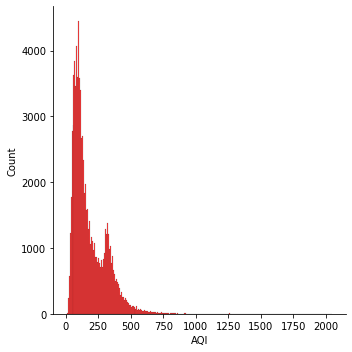

In [10]:
# distribution of aqi from 2015-2020
sns.displot(station_merged_data, x="AQI", color="red")
plt.show()

* the avarage aqi across 87000 readings from station all over india has spike in the range of 100-200 and another spike in the range of 300-400

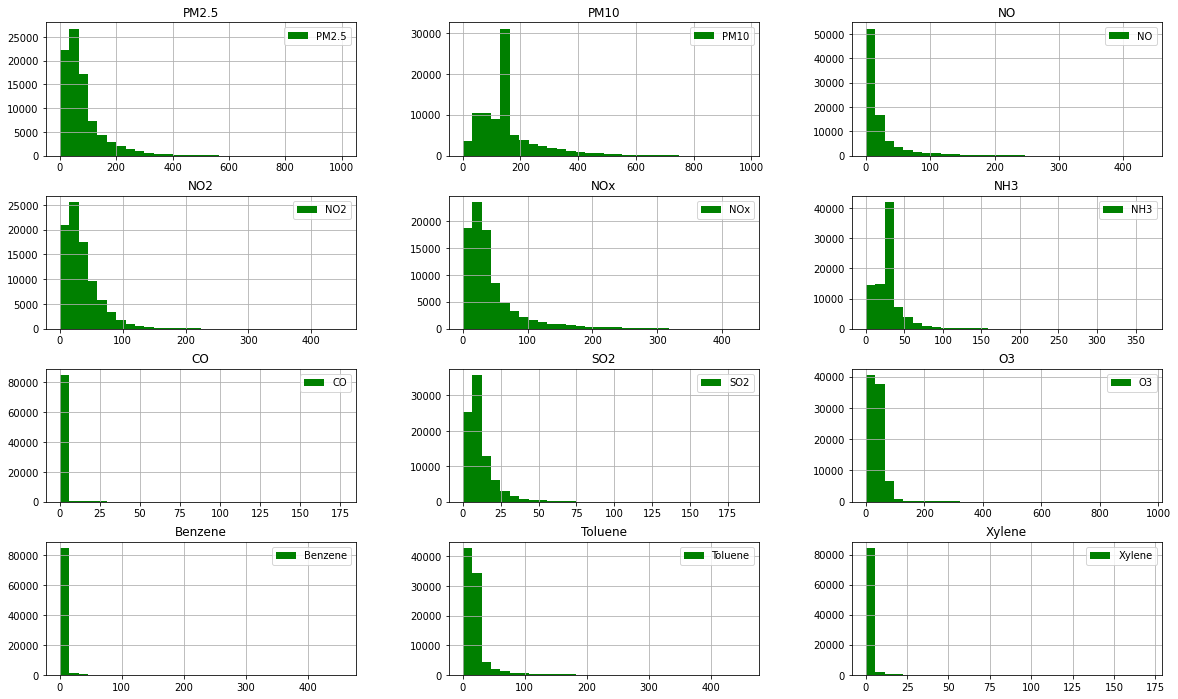

In [11]:
# distribution of values of toxic gasses in the air
station_merged_data[[i for i in station_merged_data.columns if i not in ["AQI_Bucket","AQI", "year", "month", "day"]]].hist(bins=30, figsize=(20, 12), color="green", legend=True)
plt.show()

* benzene, xylene and etc are usually 0 so they are not a problem
* but PM10, PM2.5, NO2, NOx, NH3 have high levels of somewhere bettween 100-200 across 87000 readings from station all over india 

### lets check the coorelation of aqi with toxic gases using a heatmap

In [12]:
correlation_table = station_merged_data.corr()
correlation_table

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.709082,0.479519,0.443618,0.467622,0.353428,0.093201,0.177381,0.127562,0.104341,0.256248,0.032832,0.804658
PM10,0.709082,1.000000,0.470107,0.426013,0.481422,0.379667,0.091326,0.202047,0.043408,0.094553,0.280590,0.019021,0.713236
NO,0.479519,0.470107,1.000000,0.579010,0.867026,0.290840,0.129720,0.177339,0.017078,0.136498,0.246489,0.021037,0.471982
NO2,0.443618,0.426013,0.579010,1.000000,0.712819,0.313107,0.187827,0.295508,0.213130,0.105740,0.255006,0.095517,0.495566
NOx,0.467622,0.481422,0.867026,0.712819,1.000000,0.301567,0.127866,0.213638,0.096535,0.139735,0.226158,0.032994,0.487958
NH3,0.353428,0.379667,0.290840,0.313107,0.301567,1.000000,0.056784,0.088511,0.099402,0.033173,0.159507,-0.001064,0.336522
CO,0.093201,0.091326,0.129720,0.187827,0.127866,0.056784,1.000000,0.374503,0.014795,0.046420,0.105771,0.098021,0.439695
SO2,0.177381,0.202047,0.177339,0.295508,0.213638,0.088511,0.374503,1.000000,0.132819,0.058136,0.197729,0.150687,0.372079
O3,0.127562,0.043408,0.017078,0.213130,0.096535,0.099402,0.014795,0.132819,1.000000,0.000108,0.077513,0.018497,0.166547
Benzene,0.104341,0.094553,0.136498,0.105740,0.139735,0.033173,0.046420,0.058136,0.000108,1.000000,0.425257,0.101794,0.105493


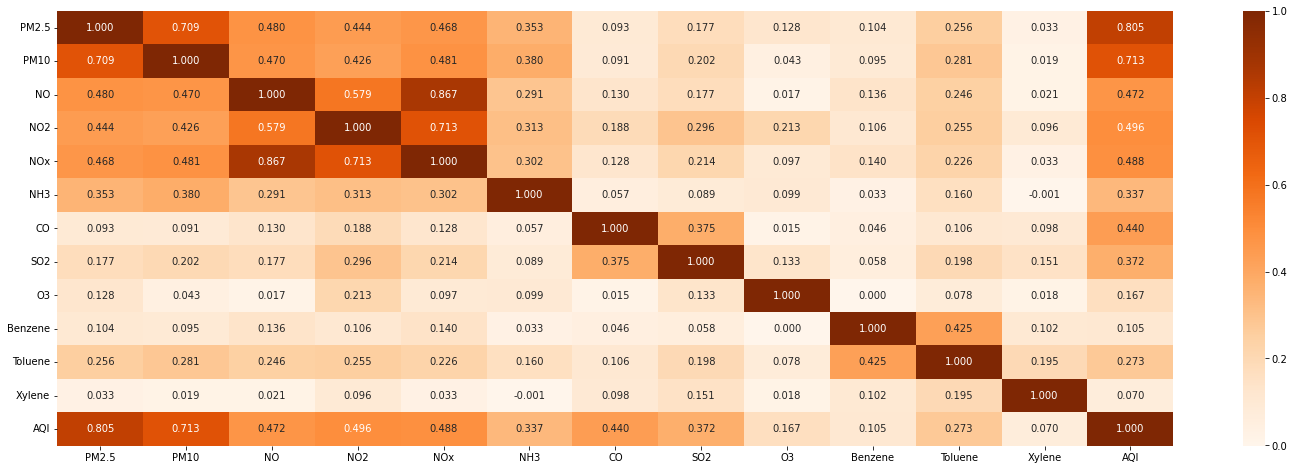

In [13]:
plt.figure(figsize=(25,8))
sns.heatmap(correlation_table, annot=True, fmt="0.3f", cmap="Oranges")
plt.show()

* from the above table the top contenders for growth of aqi are PM2.5, PM19, NO, NO2, NOx, CO, SO2, NH3, TOULENE in this order

### this does it for exploratory analysis of aqi station readings across india now its time to test and train the models

# ________________________________________________________________________________________________________
# 4. data preproccessing and spiliting our dataset into target_y and features_x dfs

In [25]:
# we wont need the aqi bucket column as we will use regression algorithms
station_merged_data = station_merged_data.drop(columns="AQI_Bucket")
target_y = station_merged_data["AQI"]
features_x = pd.DataFrame(station_merged_data.drop(columns="AQI"))

target_y

0        184.0
1        197.0
2        198.0
3        188.0
4        173.0
         ...  
87020     50.0
87021     65.0
87022     63.0
87023     57.0
87024     59.0
Name: AQI, Length: 87025, dtype: float64

In [26]:
features_x

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,81.40,124.50,1.440000,20.500000,12.080000,10.720000,0.12,15.24,127.09,0.20,6.50,0.060000
1,78.32,129.06,1.260000,26.000000,14.850000,10.280000,0.14,26.96,117.44,0.22,7.95,0.080000
2,88.76,135.32,6.600000,30.850000,21.770000,12.910000,0.11,33.59,111.81,0.29,7.63,0.120000
3,64.18,104.09,2.560000,28.070000,17.010000,11.420000,0.09,19.00,138.18,0.17,5.02,0.070000
4,72.47,114.84,5.230000,23.200000,16.590000,12.250000,0.16,10.55,109.74,0.21,4.71,0.080000
...,...,...,...,...,...,...,...,...,...,...,...,...
87020,8.65,16.46,23.244401,35.118825,43.246664,28.654163,0.69,4.36,30.59,1.32,7.26,2.770696
87021,11.80,18.47,23.244401,35.118825,43.246664,28.654163,0.68,3.49,38.95,1.42,7.92,2.770696
87022,18.60,32.26,13.650000,200.870000,214.200000,11.400000,0.78,5.12,38.17,3.52,8.64,2.770696
87023,16.07,39.30,7.560000,29.130000,36.690000,29.260000,0.69,5.88,29.64,1.86,8.40,2.770696


In [27]:
features_x.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
count,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000
mean,80.387649,158.557614,23.244401,35.118825,43.246664,28.654163,1.615741,12.212651,38.320547,3.566688,16.557039,2.770696
std,74.423783,105.210343,34.222470,28.762116,44.189047,19.467973,4.183293,11.762390,37.327266,10.105827,25.333435,3.260980
min,0.040000,0.030000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000
25%,32.960000,89.370000,4.920000,15.390000,16.160000,18.000000,0.610000,5.530000,20.420000,0.480000,2.300000,2.770696
50%,58.530000,158.557614,10.620000,27.790000,30.040000,28.654163,0.980000,10.190000,34.220000,2.530000,16.190000,2.770696
75%,97.330000,167.020000,24.180000,46.290000,50.470000,29.740000,1.560000,13.960000,44.660000,3.566688,16.557039,2.770696
max,1000.000000,976.770000,437.850000,448.050000,434.900000,365.680000,175.810000,186.080000,963.000000,455.030000,454.850000,170.370000


### why we are scaling our dataframe

* the data in features_x is on diffrent scale as in PM10 is in between 0.03 - 976.77 on the other hand CO is in range of 0.01 - 186.08
* if we feed this data to our models straight up it will be biased towards higher values in some models
* therefore we will standardize our value between -3 - 3 so our models generalize better to future values

In [28]:
scaler = StandardScaler()

features_x = pd.DataFrame(scaler.fit_transform(features_x),columns=features_x.columns)
features_x.describe().round(2)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
count,87025.00,87025.00,87025.00,87025.00,87025.00,87025.00,87025.00,87025.00,87025.00,87025.00,87025.00,87025.00
mean,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.08,-1.51,-0.68,-1.22,-0.98,-1.47,-0.39,-1.04,-1.03,-0.35,-0.65,-0.85
25%,-0.64,-0.66,-0.54,-0.69,-0.61,-0.55,-0.24,-0.57,-0.48,-0.31,-0.56,0.00
50%,-0.29,0.00,-0.37,-0.25,-0.30,0.00,-0.15,-0.17,-0.11,-0.10,-0.01,0.00
75%,0.23,0.08,0.03,0.39,0.16,0.06,-0.01,0.15,0.17,0.00,-0.00,0.00
max,12.36,7.78,12.12,14.36,8.86,17.31,41.64,14.78,24.77,44.67,17.30,51.40


* notice how the mean and standard deviation of features_x has changed the mean is now 0 and standard deviation now 1

array([[<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'NO'}>],
       [<AxesSubplot:title={'center':'NO2'}>,
        <AxesSubplot:title={'center':'NOx'}>,
        <AxesSubplot:title={'center':'NH3'}>],
       [<AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'O3'}>],
       [<AxesSubplot:title={'center':'Benzene'}>,
        <AxesSubplot:title={'center':'Toluene'}>,
        <AxesSubplot:title={'center':'Xylene'}>]], dtype=object)

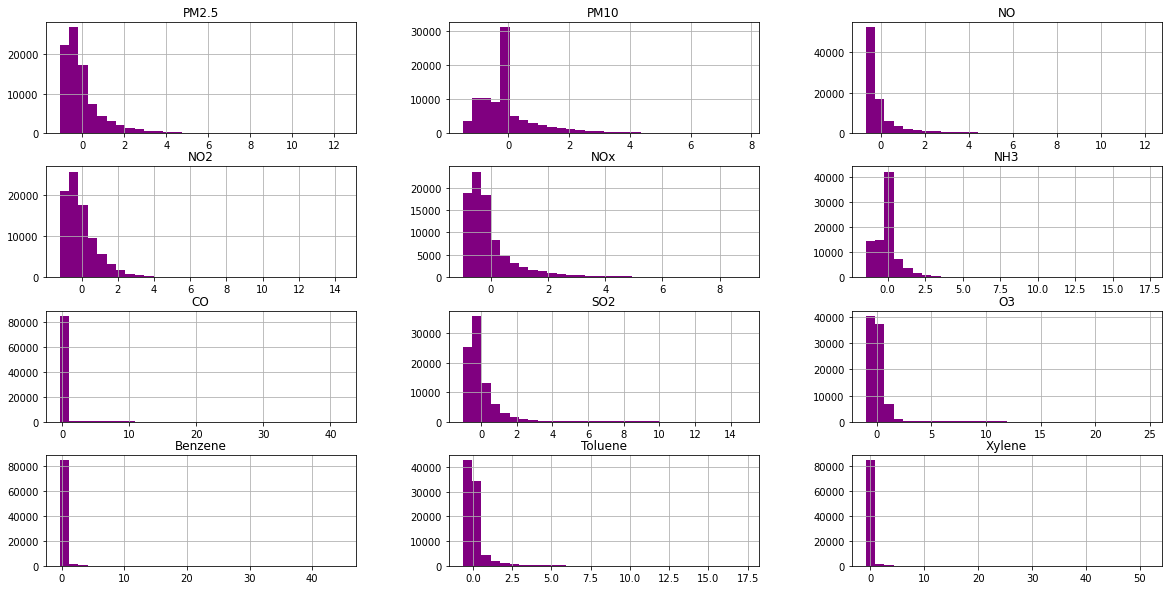

In [29]:
features_x.hist(bins=30, figsize=(20,10), color="purple")

* notice how the x axis for most of the values has changed and everything has came down to a similar scale
* notice distribution of our data it is "right skewed" 
* the min and max values of our columns range from -ve to +ve so we will use yeo transform to normalise some of our columns

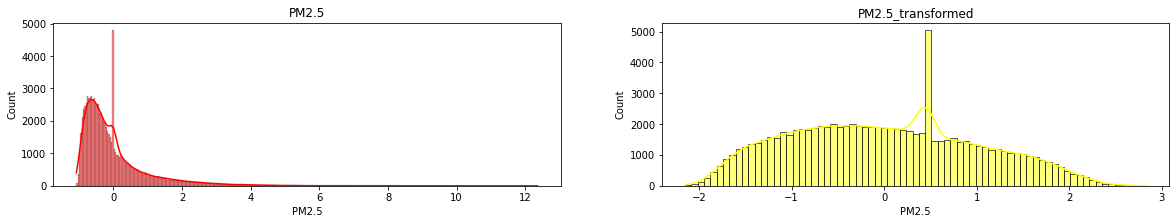

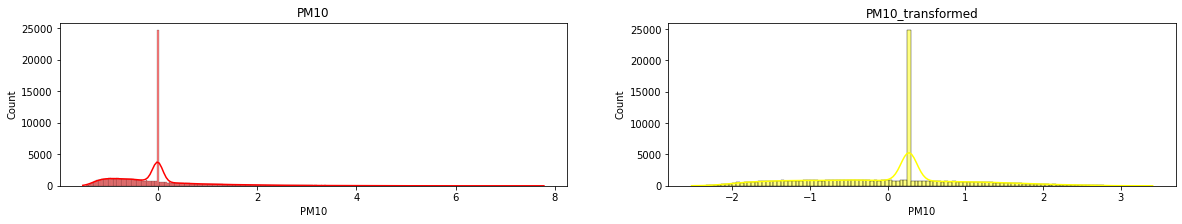

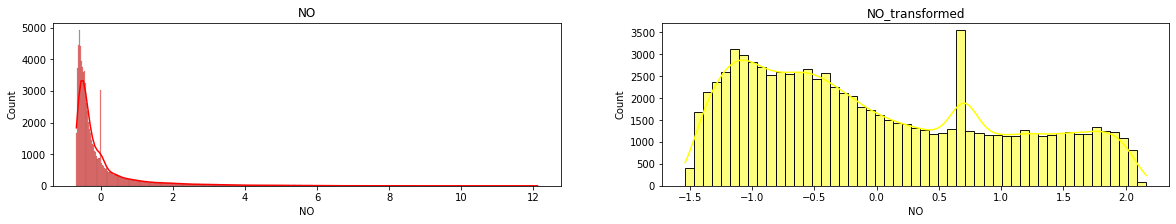

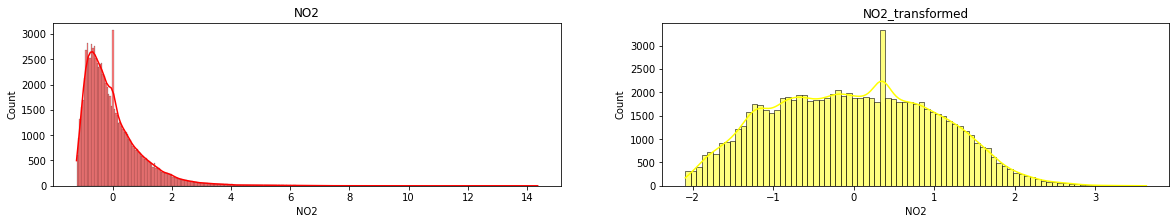

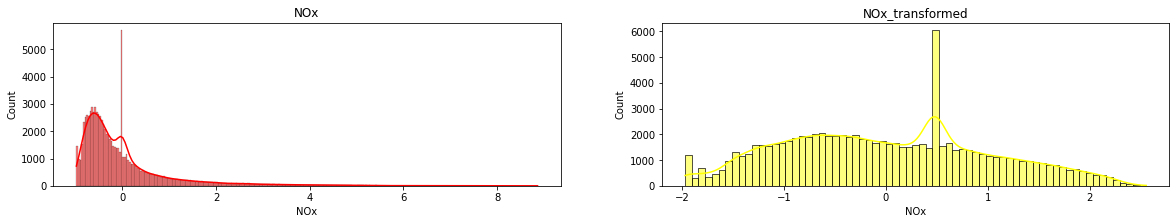

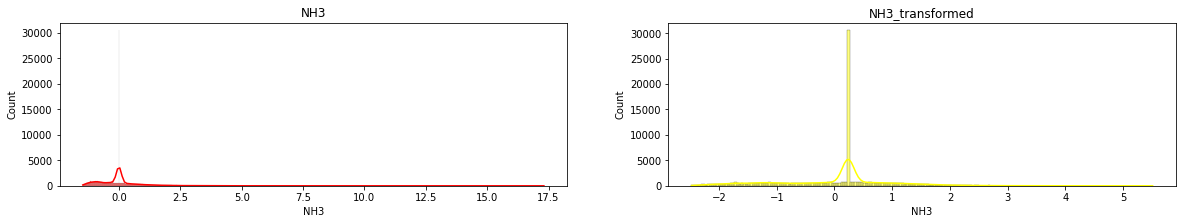

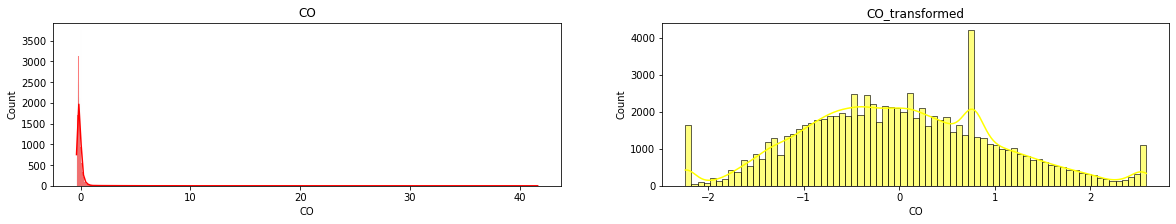

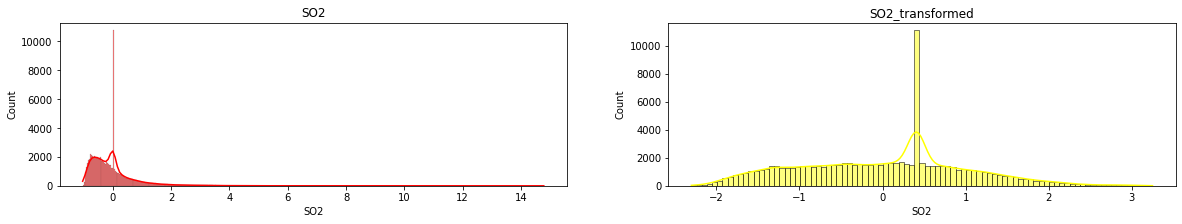

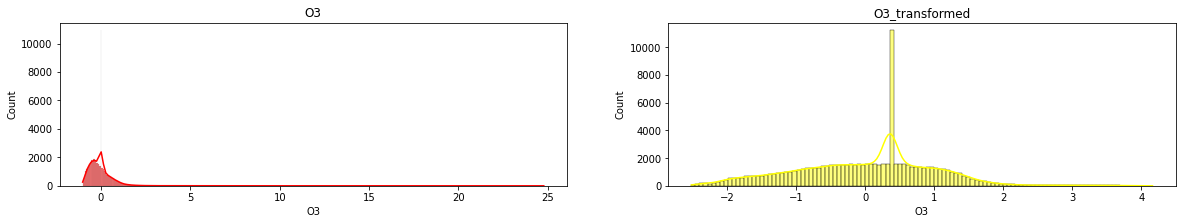

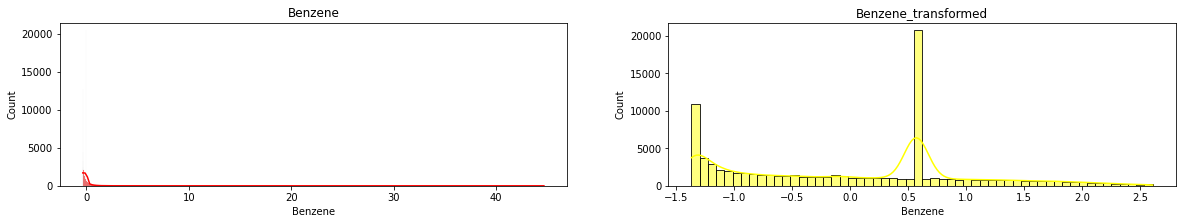

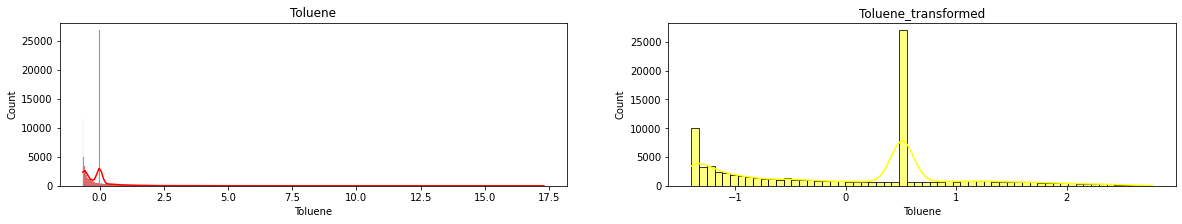

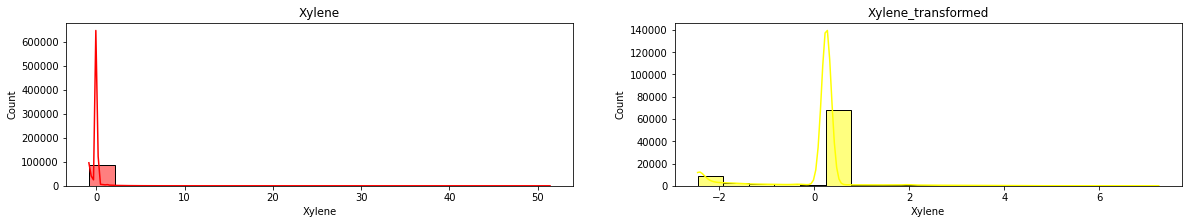

In [30]:
# using yeo transform to transform features_x 

pt = PowerTransformer() # by default the mehtod is yeo transform

features_x_transformed = pt.fit_transform(features_x)
features_x_transformed = pd.DataFrame(features_x_transformed, columns=features_x.columns)
for col in features_x_transformed.columns:

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,3))
    sns.histplot(features_x[col],kde=True,color="red", ax=ax1)
    ax1.set_title(str(col))
    sns.histplot(features_x_transformed[col],color="yellow",kde=True,ax=ax2)
    ax2.set_title(str(col+"_transformed"))
    plt.show()

In [31]:
features_x = features_x_transformed

* the yeo transformation has done its wonders and most of the columns are now normalised making our data a good fit for XGBOOST reggressor multiple linear regression and svr

# _______________________________________________________________________________________________
# 5. using train test split and fitting our data into ml models of choice

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(features_x, target_y, random_state=0)

print(f"training data --> X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"testing data --> X_test: {X_test.shape}, Y_test: {Y_test.shape}")


training data --> X_train: (65268, 12), Y_train: (65268,)
testing data --> X_test: (21757, 12), Y_test: (21757,)


In [35]:
# fitting our data into a multiple linear regression model and storing the scores in results 

mlr_model = LinearRegression().fit(X_train, Y_train)
xgb_model = XGBRegressor().fit(X_train, Y_train)
svr_model = SVR(kernel="rbf").fit(X_train, Y_train)

# ________________________________________________________________________
# 6. evaluating our models

In [48]:
mea_scores = []
cross_val_scores = []


training_scores = [mlr_model.score(X_train, Y_train), xgb_model.score(X_train, Y_train), svr_model.score(X_train, Y_train)]

In [49]:
mlr_model_prediction = mlr_model.predict(X_test)
xgb_model_prediction = xgb_model.predict(X_test)
svr_model_prediction = svr_model.predict(X_test)

testing_scores = [metrics.r2_score(mlr_model_prediction, Y_test), metrics.r2_score(xgb_model_prediction, Y_test), metrics.r2_score(svr_model_prediction, Y_test)]

# i made the mistake here overwrting the testing scores with mea scores
# testing_scores = [metrics.mean_absolute_error(mlr_model_prediction, Y_test), metrics.mean_absolute_error(xgb_model_prediction, Y_test), metrics.mean_absolute_error(svr_model_prediction, Y_test)]

cross_val_score = [cross_val_score(mlr_model,features_x, target_y,cv=3),cross_val_score(xgb_model,features_x, target_y,cv=3),cross_val_score(svr_model,features_x, target_y,cv=3)]

print(training_scores)
print(testing_scores)
print(testing_scores)
print(cross_val_score)

[0.6830858847902501, 0.9541530477634004, 0.7684443582458852]
[48.53949516267006, 21.222482760831287, 31.747823732236363]
[48.53949516267006, 21.222482760831287, 31.747823732236363]
[array([0.7226275 , 0.52548695, 0.55738587]), array([0.90997801, 0.7185263 , 0.89052393]), array([0.7546699 , 0.55527995, 0.78141597])]


* i made a mistake with name with testing scores having mea in them i cannot re run the code as it took 34 mins because of the svr model
* in the code below cross_val_scores has the mean of all 3 cross_val_score of the model
* mea_scores is now at the correct place
* testing score are now at the correct place

In [75]:
cross_val_scores = [sum(i)/len(i) for i in cross_val_score]
mea_scores = [metrics.mean_absolute_error(mlr_model_prediction, Y_test), metrics.mean_absolute_error(xgb_model_prediction, Y_test), metrics.mean_absolute_error(svr_model_prediction, Y_test)]
testing_scores = [metrics.r2_score(mlr_model_prediction, Y_test), metrics.r2_score(xgb_model_prediction, Y_test), metrics.r2_score(svr_model_prediction, Y_test)]


model_names = ["mlr_model", "xgb_model","svr_model"]
final_scores_df = pd.DataFrame({"model_names":model_names ,"training_scores": training_scores,"testing_scores": testing_scores, "mea_scores": mea_scores, "cross_val_scores": cross_val_scores}).round(2)
final_scores_df

,model_names,training_scores,testing_scores,mea_scores,cross_val_scores
0,mlr_model,0.68,0.58,48.54,0.60
1,xgb_model,0.95,0.91,21.22,0.84
2,svr_model,0.77,0.67,31.75,0.70


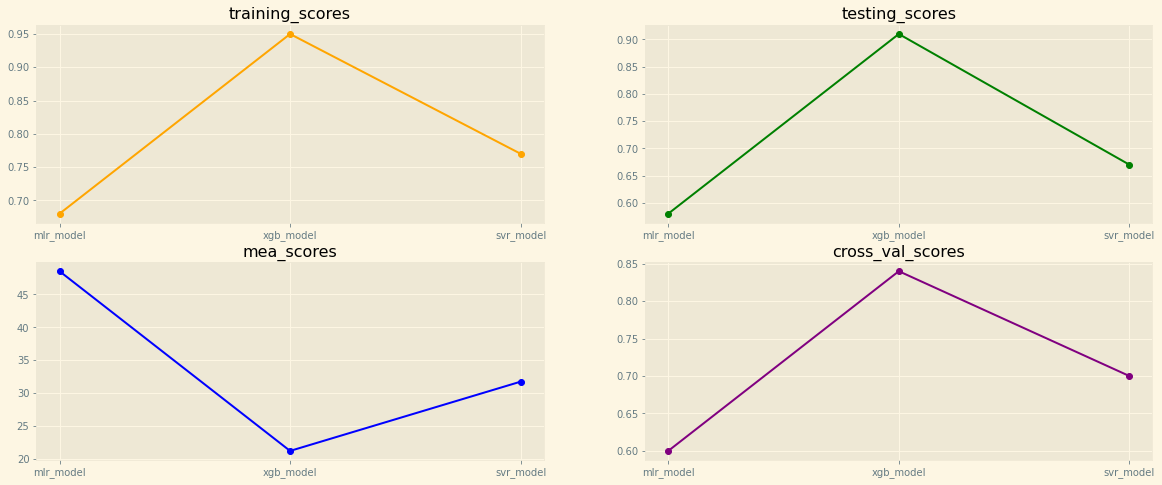

In [76]:
mpl.style.use("Solarize_Light2")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(20, 8))

ax1.plot(model_names,final_scores_df["training_scores"],color="orange", marker="o")
ax1.set_title("training_scores")

ax2.plot(model_names,final_scores_df["testing_scores"],color="green", marker="o")
ax2.set_title("testing_scores")

ax3.plot(model_names,final_scores_df["mea_scores"],color="Blue", marker="o")
ax3.set_title("mea_scores")

ax4.plot(model_names,final_scores_df["cross_val_scores"],color="purple", marker="o")
ax4.set_title("cross_val_scores")

plt.show()

In [81]:
xgb_model_mse = metrics.mean_squared_error(xgb_model_prediction, Y_test)
xgb_model_mea = metrics.mean_absolute_error(xgb_model_prediction, Y_test)
xgb_model_rmse = math.sqrt(xgb_model_mse)

print("The mean absolute error of the model is : ",xgb_model_mea.round(2))
print("The mean squared error of the model is : ",xgb_model_mse.round(2))
print("The mean root mean squared error of the model is : ",xgb_model_rmse)

The mean absolute error of the model is :  21.22
The mean squared error of the model is :  1369.85
The mean root mean squared error of the model is :  37.01153531743638


# ______________________________________________________________________________________________
# 7. conclusion

### from the above tables and plots we can conclude these things
* XGBRegressor is the fastest and the best model with a cross_val_score of 0.84 and testing score of 0.91
* the best mea_score i could get was 21.22 which is not bad as aqi ranges from 0 - 400 but it can still be worked on
* The SVR model was the worst one of them all with it taking somewhere around 45min to train and test and the cross_val_score abd testing score 0.70, 0.67 respectively (mlr model has lower score but it took way less time to train and test)


# 8. has the main goal of the notebook been achived?

* The best model in the research paper was (Ridge regression mea = 27.907, rmse = 36.791, r2 = 0.8089) on city_data csv
* my best model in this notebook was (xgb_model mea = 21.22, rmse = 37.011, r2 = 0.91) on station_data csv

* the city_data csv has only 30000 rows while station_data csv has 100000 which is way more data 
* my model has achived better mea and r2 scores on a bigger scale of data making it better than the ridge reggression model made in the research paper

* but my is not the best and can still be upgraded 
* xgb_model has worse rmse of 37.011 which is 1 units more than rigde regression model

# _________________________________________________________________________________________________________
# 9. saving the model into a binary file so we can use it in the GUI program

In [84]:
xgb_model_file_path = "F://aryans_code_notes//machine_learning//AQI_predictior//xgb_model"
joblib.dump(xgb_model, xgb_model_file_path)

['F://aryans_code_notes//machine_learning//AQI_predictior//xgb_model']

# ________________________________________________________________________________
# made by Aryan rathore (cse core student at vit bhopal)
# email :- Aryanrathore13572002@gmail.com
# linkedin :- https://www.linkedin.com/in/aryan-rathore-b15459215/
# github :- https://github.com/aryanrathore1012
# ________________________________________________________________________________